In [0]:
from zipfile import ZipFile

with ZipFile("train.zip", 'r') as zip:
  zip.extractall()
  
with ZipFile("test.zip", 'r') as zip:
  zip.extractall()


In [1]:
%pylab inline


import os
import random

import pandas as pd
from scipy.misc import imread

import warnings
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("train.csv")
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [3]:
test=pd.read_csv("test.csv")
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [4]:
index=random.choice(train.index)
img_name=train.ID[index]
img=imread(os.path.join("Train",img_name))
#print("Age",train.Class[index])
img.view()

array([[[119, 154, 192],
        [119, 155, 191],
        [118, 154, 190],
        ...,
        [ 45,  37,  52],
        [ 45,  37,  52],
        [ 45,  37,  52]],

       [[120, 155, 193],
        [120, 156, 192],
        [120, 156, 192],
        ...,
        [ 47,  39,  54],
        [ 47,  39,  54],
        [ 47,  39,  54]],

       [[122, 157, 195],
        [121, 157, 193],
        [121, 157, 193],
        ...,
        [ 51,  43,  58],
        [ 51,  43,  58],
        [ 50,  42,  57]],

       ...,

       [[158, 184, 211],
        [157, 183, 210],
        [157, 183, 210],
        ...,
        [170, 125, 119],
        [170, 125, 119],
        [170, 125, 119]],

       [[157, 183, 210],
        [156, 182, 209],
        [156, 182, 209],
        ...,
        [170, 125, 119],
        [170, 125, 119],
        [170, 125, 119]],

       [[157, 183, 210],
        [156, 182, 209],
        [156, 182, 209],
        ...,
        [170, 125, 119],
        [170, 125, 119],
        [170, 125, 119]]

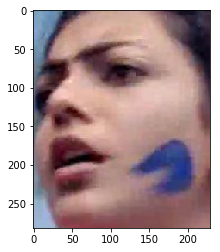

In [5]:
imshow(img)

In [0]:
from scipy.misc import imresize

temp=[]
for img_name in train.ID:
  img_path=os.path.join("Train",img_name)
  img=imread(img_path)
  img=imresize(img,(32,32))
  img=img.astype("float32")
  temp.append(img)
  
  
  
train_x=np.stack(temp)
train_x/=255
  

In [0]:
temp1=[]
for img_name in test.ID:
  img_path=os.path.join("Test",img_name)
  img=imread(img_path)
  img=imresize(img,(32,32))
  img=img.astype("float32")
  temp1.append(img)
  
  
  
test_x=np.stack(temp1)
test_x/=255

In [9]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [10]:
import keras
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
train_y=lb.fit_transform(train.Class)
train_y=keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [0]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [13]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 4s - loss: 0.8970 - acc: 0.5762
Epoch 2/5
 - 4s - loss: 0.8469 - acc: 0.6014
Epoch 3/5
 - 4s - loss: 0.8262 - acc: 0.6162
Epoch 4/5
 - 4s - loss: 0.8140 - acc: 0.6229
Epoch 5/5
 - 4s - loss: 0.8059 - acc: 0.6283


In [16]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)


Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 4s 228us/step - loss: 0.8008 - acc: 0.6345 - val_loss: 0.8768 - val_acc: 0.5856
Epoch 2/5
15924/15924 [==============================] - 4s 224us/step - loss: 0.7971 - acc: 0.6330 - val_loss: 0.8054 - val_acc: 0.6341
Epoch 3/5
15924/15924 [==============================] - 4s 224us/step - loss: 0.7915 - acc: 0.6395 - val_loss: 0.7883 - val_acc: 0.6359
Epoch 4/5
15924/15924 [==============================] - 4s 224us/step - loss: 0.7851 - acc: 0.6404 - val_loss: 0.8365 - val_acc: 0.6022
Epoch 5/5
15924/15924 [==============================] - 4s 224us/step - loss: 0.7794 - acc: 0.6505 - val_loss: 0.7723 - val_acc: 0.6570


In [19]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("sub01.csv", index=False)
submission=pd.read_csv("sub01.csv")
submission.head()

,ID,Class
0,25321.jpg,MIDDLE
1,989.jpg,YOUNG
2,19277.jpg,MIDDLE
3,13093.jpg,MIDDLE
4,5367.jpg,OLD
